Group #3 ICG Group Project

In [134]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


In [135]:
data=pd.read_csv('company3.csv')

In [136]:
data.head()

,Date,Store,Dept,Weekly_Sales,IsHoliday
0,2010-02-05,1,1,32452.79,False
1,2010-02-12,1,1,50360.71,True
2,2010-02-19,1,1,28504.70,False
3,2010-02-26,1,1,23033.73,False
4,2010-03-05,1,1,29662.30,False


In [137]:
data.describe()

,Store,Dept,Weekly_Sales
count,14603.000000,14603.000000,14603.000000
mean,5.766144,29.193043,14067.041557
std,1.955651,30.650536,16407.657180
min,1.000000,1.000000,-4988.940000
25%,5.000000,4.000000,3039.790000
50%,7.000000,17.000000,8205.250000
75%,7.000000,48.000000,20993.275000
max,7.000000,99.000000,266480.630000


In [138]:
data.isnull().sum()

Date            0
Store           0
Dept            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14603 entries, 0 to 14602
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          14603 non-null  object 
 1   Store         14603 non-null  int64  
 2   Dept          14603 non-null  int64  
 3   Weekly_Sales  14603 non-null  float64
 4   IsHoliday     14603 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 470.7+ KB


In [140]:
data['Date'] = pd.to_datetime(data['Date'],format='%Y-%m-%d')
data.set_index('Date',inplace=True)


In [141]:
data.head()

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-02-05,1,1,32452.79,False
2010-02-12,1,1,50360.71,True
2010-02-19,1,1,28504.70,False
2010-02-26,1,1,23033.73,False
2010-03-05,1,1,29662.30,False


In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14603 entries, 2010-02-05 to 2012-08-24
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         14603 non-null  int64  
 1   Dept          14603 non-null  int64  
 2   Weekly_Sales  14603 non-null  float64
 3   IsHoliday     14603 non-null  bool   
dtypes: bool(1), float64(1), int64(2)
memory usage: 470.6 KB


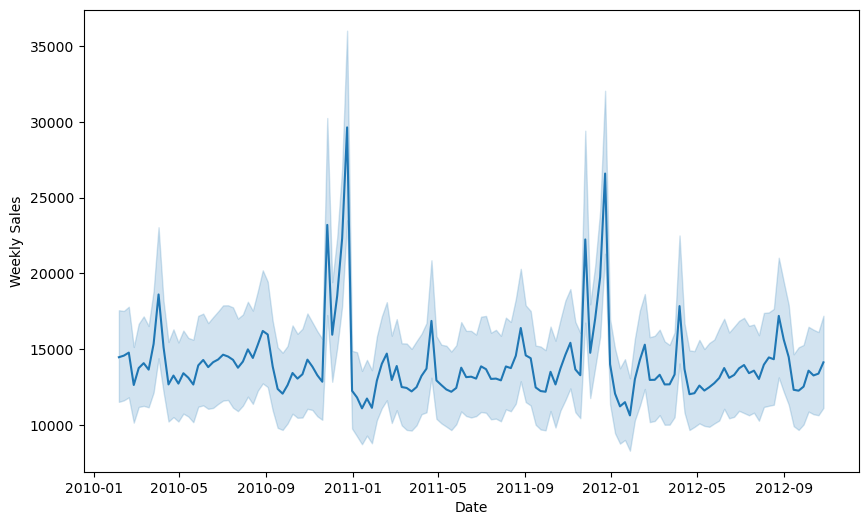

In [143]:
plt.figure(figsize=(10,6))
sb.lineplot(data=data,x='Date',y='Weekly_Sales')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()    

Time series analysis for store=1 and depatment=1

In [363]:
store11=data[(data['Store']==7) &(data['Dept']==1)]
store11


,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-02-05,7,1,14715.68,False
2010-02-12,7,1,25741.59,True
2010-02-19,7,1,18411.25,False
2010-02-26,7,1,11489.09,False
2010-03-05,7,1,14805.98,False
...,...,...,...,...
2012-09-28,7,1,12910.26,False
2012-10-05,7,1,14484.46,False
2012-10-12,7,1,15582.01,False


In [364]:
store11=store11.drop(['Store','Dept'],axis=1)
store11

,Weekly_Sales,IsHoliday
Date,,
2010-02-05,14715.68,False
2010-02-12,25741.59,True
2010-02-19,18411.25,False
2010-02-26,11489.09,False
2010-03-05,14805.98,False
...,...,...
2012-09-28,12910.26,False
2012-10-05,14484.46,False
2012-10-12,15582.01,False


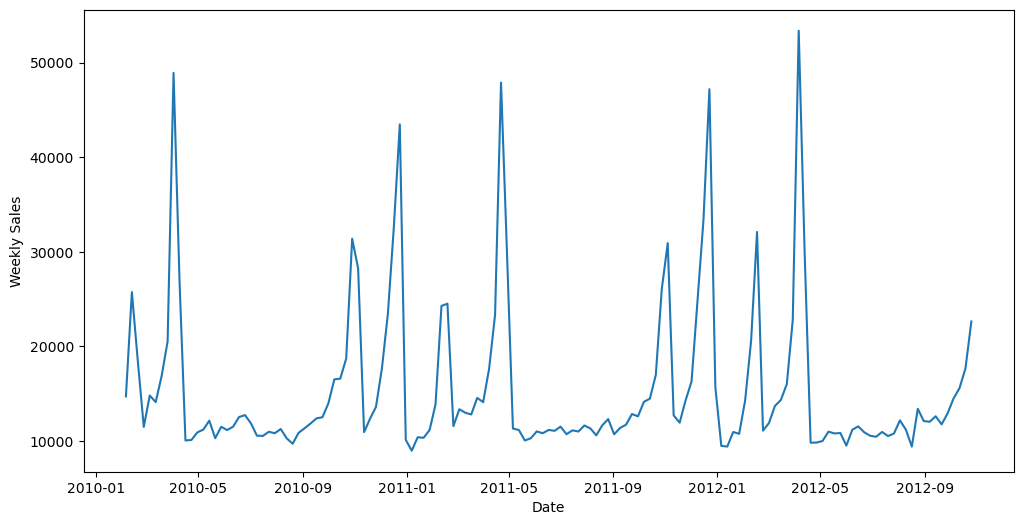

In [365]:

plt.figure(figsize=(12, 6))
sb.lineplot(data=store11, x='Date', y='Weekly_Sales')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')

plt.show()

In [366]:
store11.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 143 entries, 2010-02-05 to 2012-10-26
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Weekly_Sales  143 non-null    float64
 1   IsHoliday     143 non-null    bool   
dtypes: bool(1), float64(1)
memory usage: 2.4 KB


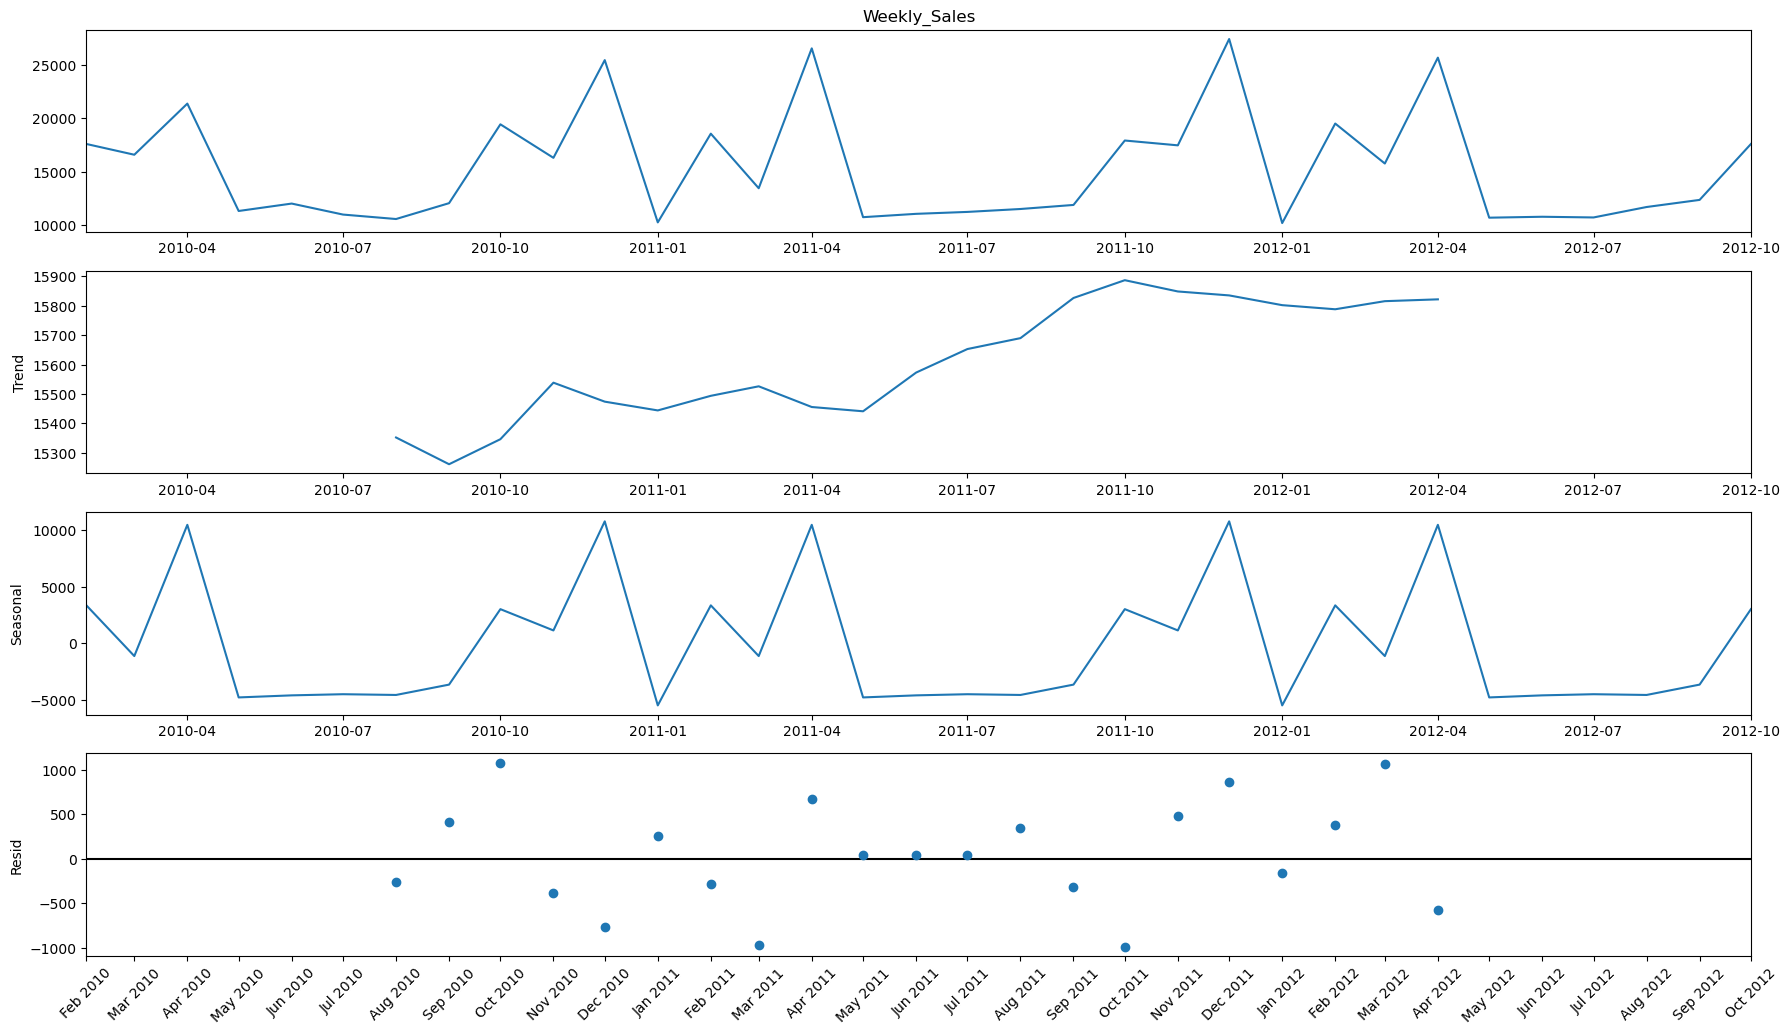

In [367]:
from matplotlib.dates import MonthLocator, DateFormatter
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
store11_Monthly_Sales = store11['Weekly_Sales'].resample('MS').mean()
from pylab import rcParams
rcParams['figure.figsize'] = 18, 10
decomposition = sm.tsa.seasonal_decompose(store11_Monthly_Sales, model='additive')
fig = decomposition.plot()
ax = plt.gca()
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%b %Y'))
plt.xticks(rotation=45)
plt.show()


In [368]:
adft = adfuller(store11_Monthly_Sales,autolag="AIC")
output_store11 = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']] , "Metric":["Test Statistics","p-value","No. of lags used","No. of observation used",
"critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(output_store11)

      Values                   Metric
0  -5.209447          Test Statistics
1   0.000008                  p-value
2  10.000000         No. of lags used
3  22.000000  No. of observation used
4  -3.769733      critical value (1%)
5  -3.005426      critical value (5%)
6  -2.642501     critical value (10%)


P=0

In [369]:
import pmdarima as pm
smodel = pm.auto_arima(store11['Weekly_Sales'], start_p=0, start_q=0,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=1.00 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=2856.629, Time=0.06 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=2769.044, Time=0.34 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=1.42 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=2855.351, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=2807.637, Time=0.06 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=2761.012, Time=0.42 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=2755.912, Time=0.82 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=2740.031, Time=0.89 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=1.22 sec
 ARIMA(1,0,0)(1,1,2)[12] intercept   : AIC=2755.942, Time=0.73 sec
 ARIMA(1,0,0)(0,1,2)[12] intercept   : AIC=inf, Time=2.23 sec
 ARIMA(1,0,0)(2,1,2)[12] intercept   : AIC=2756.941, Time=1.43 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=2801.819, Time=0.25 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  143
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 12)   Log Likelihood               -1355.504
Date:                            Tue, 25 Jul 2023   AIC                           2723.008
Time:                                    00:19:32   BIC                           2740.259
Sample:                                02-05-2010   HQIC                          2730.018
                                     - 10-26-2012                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    803.6380    418.094      1.922      0.055     -15.812    1623.088
ar.L1          0.1513      0.149      1.014      0.310      -0.141       0.444
ma.L1          0.5197      0.163      3.188      0.001       0.200       0.839
ar.S.L12      -0.1126      0.138     -0.816      0.415      -0.383       0.158
ma.S.L12      -0.8613      0.130     -6.648      0.000      -1.115      -0.607
sigma2      5.892e+07      0.009   6.24e+09      0.000    5.89e+07    5.89e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):               159.21
Prob(Q):                              0.68   Prob(JB):                         0.00
Heteroskedasticity (H):               1.45   Skew:                             1.41
Prob(H) (two-sided):                  0.22   Kurtosis:                         7.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.35e+25. Standard errors may be unstable.
"""

In [370]:
predicted=smodel.predict(n_periods=26)


In [371]:
store11pred=pd.DataFrame( predicted,columns=['Weekly_Sales'])
store11pred


,Weekly_Sales
2012-11-02,17627.595020
2012-11-09,18119.827551
2012-11-16,20263.573133
2012-11-23,22833.330251
2012-11-30,21037.113210
2012-12-07,19129.474672
2012-12-14,22540.372183
2012-12-21,20909.470790
2012-12-28,18493.309742
2013-01-04,19198.634154


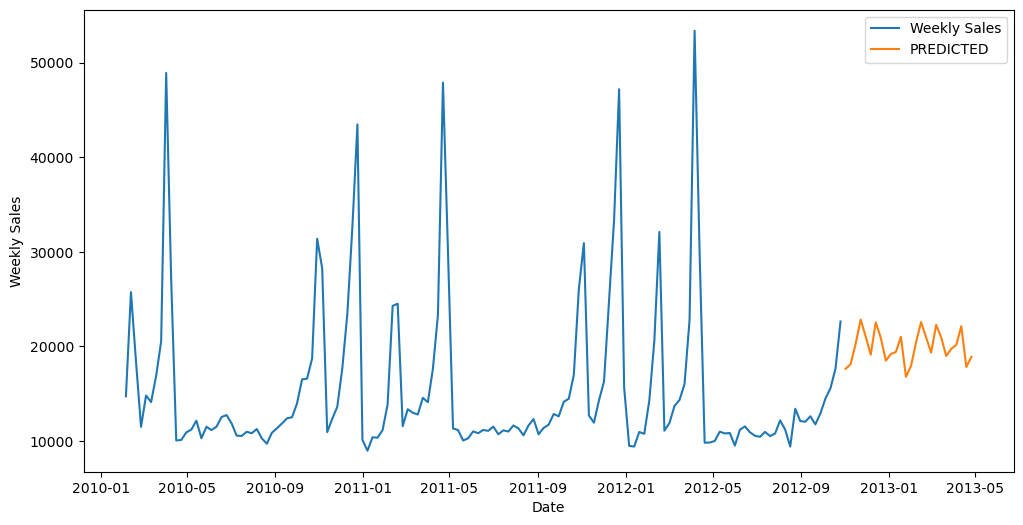

In [372]:
plt.figure(figsize=(12,6))
sb.lineplot(data=store11 , x=store11.index,y="Weekly_Sales",label='Weekly Sales' )
sb.lineplot(data=store11pred,x=store11pred.index,y='Weekly_Sales',label='PREDICTED')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()